In [134]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [135]:
def F(x):
    return (1 / 8) * np.cos(x - 8)

In [136]:
x0, xn, n = -8, 8, 20  
h = (xn - x0) / n
x_values = np.linspace(x0, xn, n+1)
y_values = F(x_values)

data = pd.DataFrame({'x': x_values, 'F(x)': y_values})

with open("tabulation.txt", "w") as file:
    file.write(data.to_string(index=False))

In [137]:
def factorial(k):
    if k < 0:
        print("Число повинно бути не менше 0!")
        return  
    result = 1
    for i in range(2, k + 1):
        result *= i
    return result

print(factorial(1))  


1


In [138]:
def combination(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))
print(combination(5,3))

10


In [139]:
def permutations(n, k):
    if k > n:
        return 0
    return factorial(n) // (factorial(k) * factorial(n - k))
print(permutations(3,3))

1


In [140]:
def step(n):
    return -1 if n % 2 else 1

In [141]:
def finite_d(k, y_values):
    suma = 0
    for j in range(k + 1):
        suma += y_values[j] * step(k - j) * combination(k, j)
    return suma

In [142]:
def factorial_p(t, k):
    mn = 1
    for i in range(k):
        mn *= (t - i)
    return mn

In [143]:
def approximate_f(n, t, y_values):
    suma = 0
    for k in range(n + 1):
        suma += finite_d(k, y_values) * factorial_p(t, k) / factorial(k)
    return suma


In [144]:
approx_value = approximate_f(n, 1, y_values)
approx = [approximate_f(n, t, y_values) for t in t_values]


t=0.00 | F=-0.119707 | F_approx=-0.119707 | error=0.00e+00
t=0.20 | F=-0.123938 | F_approx=-0.123941 | error=2.61e-06
t=0.40 | F=-0.124939 | F_approx=-0.124941 | error=2.23e-06
t=0.61 | F=-0.122684 | F_approx=-0.122685 | error=1.22e-06
t=0.81 | F=-0.117231 | F_approx=-0.117231 | error=4.22e-07
t=1.01 | F=-0.108722 | F_approx=-0.108722 | error=1.40e-08
t=1.21 | F=-0.097380 | F_approx=-0.097380 | error=1.66e-07
t=1.41 | F=-0.083500 | F_approx=-0.083500 | error=1.62e-07
t=1.62 | F=-0.067444 | F_approx=-0.067444 | error=1.01e-07
t=1.82 | F=-0.049630 | F_approx=-0.049630 | error=3.82e-08
t=2.02 | F=-0.030522 | F_approx=-0.030522 | error=2.99e-09
t=2.22 | F=-0.010619 | F_approx=-0.010619 | error=2.05e-08
t=2.42 | F=0.009561 | F_approx=0.009561 | error=2.15e-08
t=2.63 | F=0.029491 | F_approx=0.029491 | error=1.43e-08
t=2.83 | F=0.048653 | F_approx=0.048653 | error=5.67e-09
t=3.03 | F=0.066547 | F_approx=0.066547 | error=7.59e-10
t=3.23 | F=0.082707 | F_approx=0.082707 | error=3.90e-09
t=3.43 

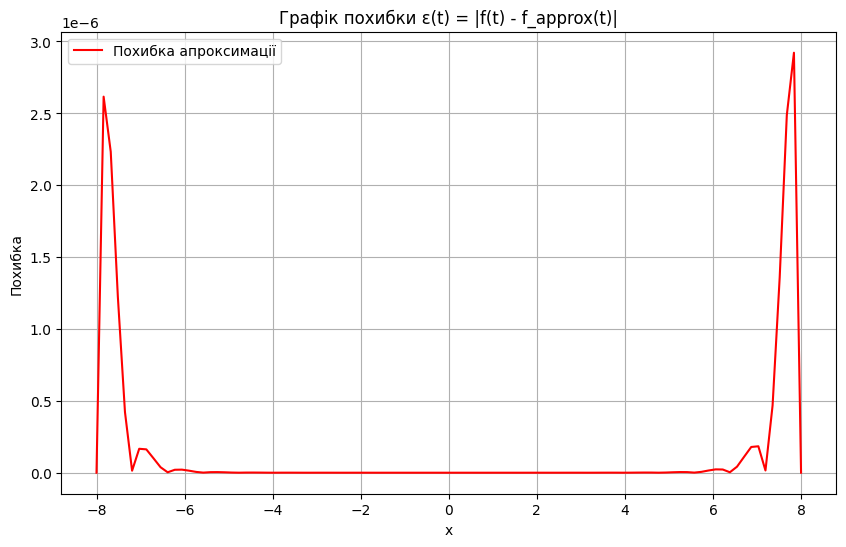

In [145]:
x_eval = x0 + t_values * h
true_values = F(x_eval)

# Похибка
errors = np.abs(true_values - approx)

# Вивід
for t, f_t, f_appr, err in zip(t_values, true_values, approx, errors):
    print(f"t={t:.2f} | F={f_t:.6f} | F_approx={f_appr:.6f} | error={err:.2e}")

# Збереження похибок у файл
df_errors = pd.DataFrame({'t': t_values, 'x': x_eval, 'F(x)': true_values, 'F_approx': approx, 'Error': errors})
df_errors.to_csv("approximation_errors.txt", index=False, sep='\t')

# Побудова графіка похибки
plt.figure(figsize=(10, 6))
plt.plot(x_eval, errors, label='Похибка апроксимації', color='red')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Графік похибки ε(t) = |f(t) - f_approx(t)|')
plt.grid(True)
plt.legend()
plt.savefig("error_plot.png")
plt.show()